In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
import cupy as cp

In [5]:
from dotmap import DotMap

In [6]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/AE/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

In [7]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

### Load data

In [8]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [9]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [10]:
from lv.base.dataloader import DataLoader

In [11]:
ds = DataLoader()

In [ ]:
from lv.pcp.pcpc import pcp_cupy

### wave = 3800 - 5000A

In [13]:
ds.prepare_data(flux0, wave0, "L", "L", fix_CO=0, para=para0, center=0)

center 0 LL0 flux: 32755, wave: 686


In [20]:
L, S, (u,s,v) = pcp_cupy(ds.flux, delta=1e-5, mu=0.66, lam = 0.005, norm=9528400, maxiter=500)

0.6604276 0.005525367872245725 9528400.0


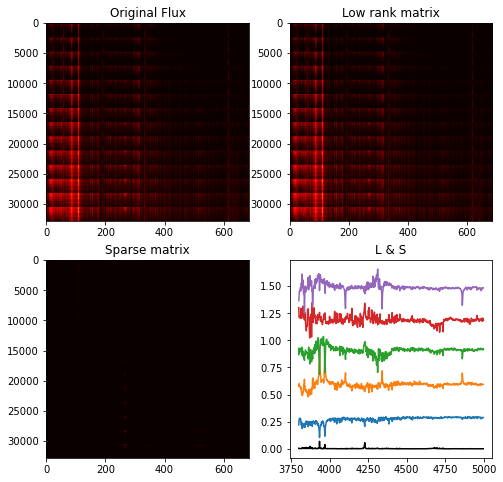

In [21]:
ds.plot_pcp(ds.flux, L,S, u,s,v)

### wave = 5000 - 8000A

In [23]:
ds.prepare_data(flux0, wave0, "L", "M", fix_CO=0, para=para0, center=0)

center 0 LM0 flux: 32755, wave: 1175


In [24]:
L, S, (u,s,v) = pcp_cupy(ds.flux, delta=1e-5, mu=None, lam = None, maxiter=500)

3.568001 0.005525367872245725 818047.25


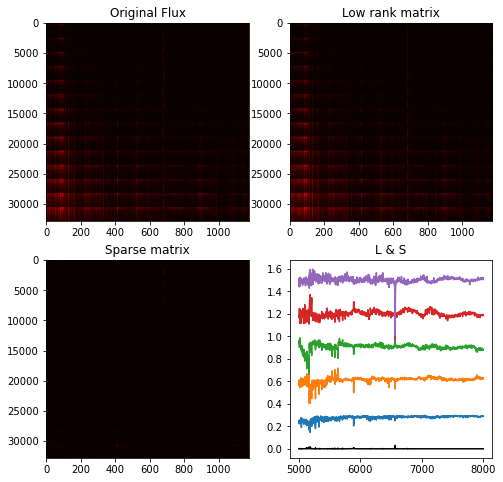

In [25]:
ds.plot_pcp(ds.flux, L,S, u,s,v)

### wave = 8000 - 13000A

In [26]:
ds.prepare_data(flux0, wave0, "L", "H", fix_CO=0, para=para0, center=0)

center 0 LH0 flux: 32755, wave: 1214


In [27]:
L, S, (u,s,v) = pcp_cupy(ds.flux, delta=1e-5, mu=None, lam = None, maxiter=500)

9.34329 0.005525367872245725 160499.33


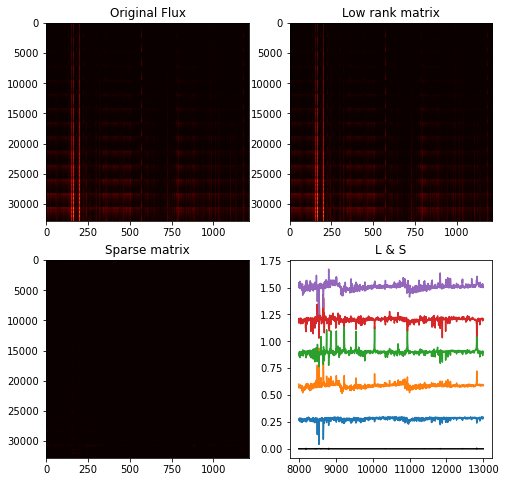

In [28]:
ds.plot_pcp(ds.flux, L,S, u,s,v)